In [1]:
INPUT_FILE = "day6.txt"

In [2]:
with open(INPUT_FILE) as f:
    lines = [s.strip() for s in f.readlines()]

# Part 1

In [3]:
from collections import namedtuple

In [4]:
Point = namedtuple("Point", 'x y')

In [5]:
len(lines)

50

In [6]:
# lines = [
#     "1, 1",
#     "1, 6",
#     "8, 3",
#     "3, 4",
#     "5, 5",
#     "8, 9",
# ]

In [7]:
lsplits = [s.split(", ") for s in lines]

In [8]:
points = [Point(int(x), int(y)) for x, y in lsplits]

In [9]:
minx, miny = min(points, key=lambda p: p.x).x, min(points, key=lambda p: p.y).y 
maxx, maxy = max(points, key=lambda p: p.x).x, max(points, key=lambda p: p.y).y

In [10]:
minx, miny, maxx, maxy

(43, 43, 353, 357)

In [11]:
border_points = {
    min(points, key=lambda p: p.x), 
    min(points, key=lambda p: p.y),
    max(points, key=lambda p: p.x), 
    max(points, key=lambda p: p.y)
}

In [12]:
n = 400

In [13]:
field = [[0]*n for _ in range(n)]

In [14]:
for i, point in enumerate(points):
    field[point.x][point.y] = i + 1

In [15]:
def manhattan_distance(p1, p2):
    return abs(p1.x - p2.x) + abs(p1.y - p2.y)

In [16]:
[1,2,3].index(3)

2

In [17]:
for i in range(n):
    for j in range(n):
        this = Point(i, j)
        distances = [manhattan_distance(this, p) for p in points]
        md = min(distances)
        
        if distances.count(md) > 1:
            field[i][j] = 0
        else:
            field[i][j] = distances.index(md) + 1

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

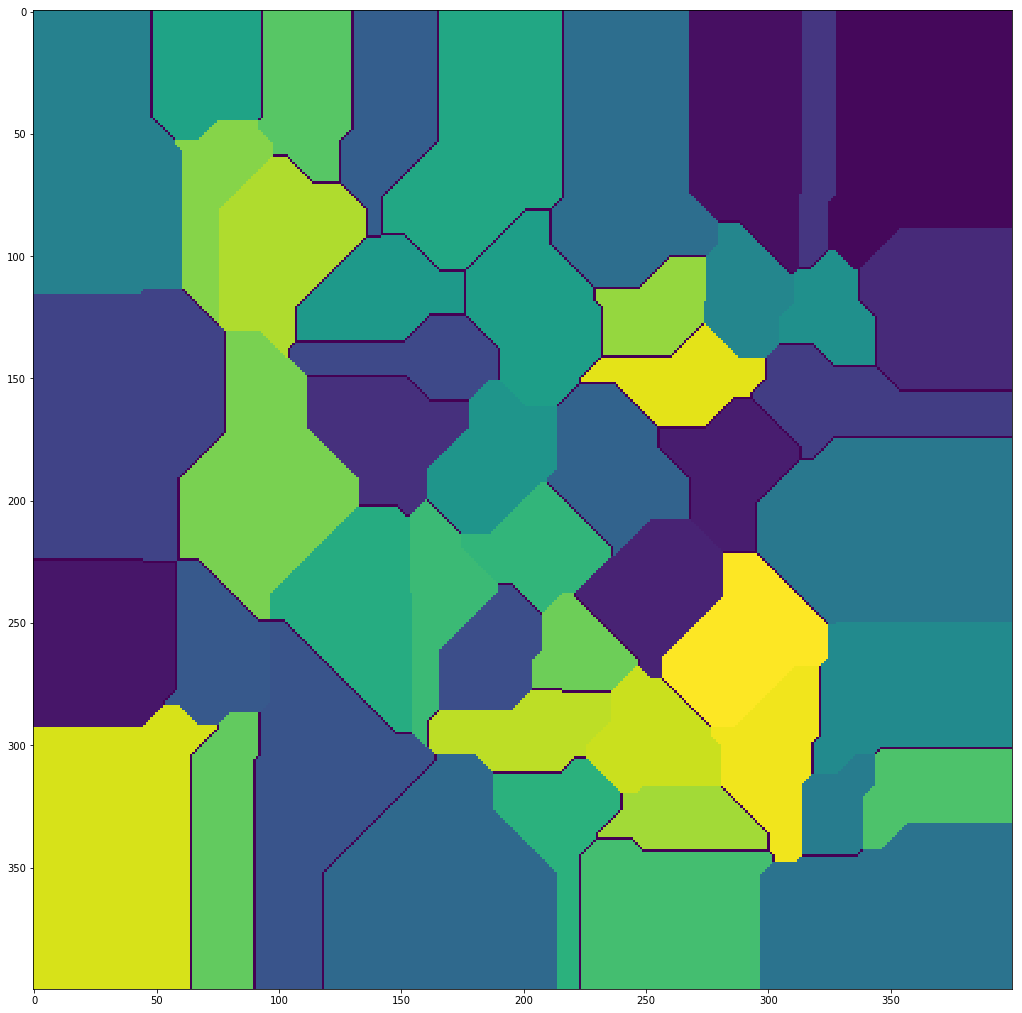

In [19]:
plt.figure(figsize=(18, 18))
plt.imshow(field)

In [20]:
for row in field:
    print(row)

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 0, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 0, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 0, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 

In [21]:
from collections import deque

In [22]:
def area(p, field):
    queue = deque()
    
    queue.append(p)
    area = 1
    this = field[p.x][p.y]
    visited = set()
    while queue:
        q = queue.popleft()
        if q in visited:
            continue
        visited.add(q)
        x, y = q

        adjacent = [
            Point(x + 1, y), 
            Point(x - 1, y),
            Point(x, y + 1),
            Point(x, y - 1)
        ]

        for a in adjacent:
            if a.x < 0 or a.y < 0:
                b = 5/0
            if this == field[a.x][a.y]:
                queue.append(a)

    return len(visited)

In [30]:
areas = []

In [31]:
for i, p in enumerate(points):
    a = None
    try:
        a = area(p, field)
        areas.append(a)
    except:
        print("Went out of bounds == Infinite area for {}".format(p))
        pass

Went out of bounds == Infinite area for Point(x=78, y=335)
Went out of bounds == Infinite area for Point(x=74, y=309)
Went out of bounds == Infinite area for Point(x=277, y=44)
Went out of bounds == Infinite area for Point(x=118, y=354)
Went out of bounds == Infinite area for Point(x=75, y=317)
Went out of bounds == Infinite area for Point(x=156, y=318)
Went out of bounds == Infinite area for Point(x=172, y=45)
Went out of bounds == Infinite area for Point(x=306, y=102)
Went out of bounds == Infinite area for Point(x=53, y=141)
Went out of bounds == Infinite area for Point(x=352, y=180)
Went out of bounds == Infinite area for Point(x=95, y=247)
Went out of bounds == Infinite area for Point(x=353, y=357)
Went out of bounds == Infinite area for Point(x=201, y=327)
Went out of bounds == Infinite area for Point(x=57, y=43)
Went out of bounds == Infinite area for Point(x=299, y=328)
Went out of bounds == Infinite area for Point(x=43, y=67)
Went out of bounds == Infinite area for Point(x=76,

In [32]:
len(areas)

27

In [34]:
max(areas)

4887

# Part 2

In [35]:
field = [[0] * n for _ in range(n)]

In [36]:
threshold = 10000

In [37]:
for i in range(n):
    for j in range(n):
        this = Point(i, j)
        field[i][j] = sum([manhattan_distance(this, p) for p in points]) < threshold

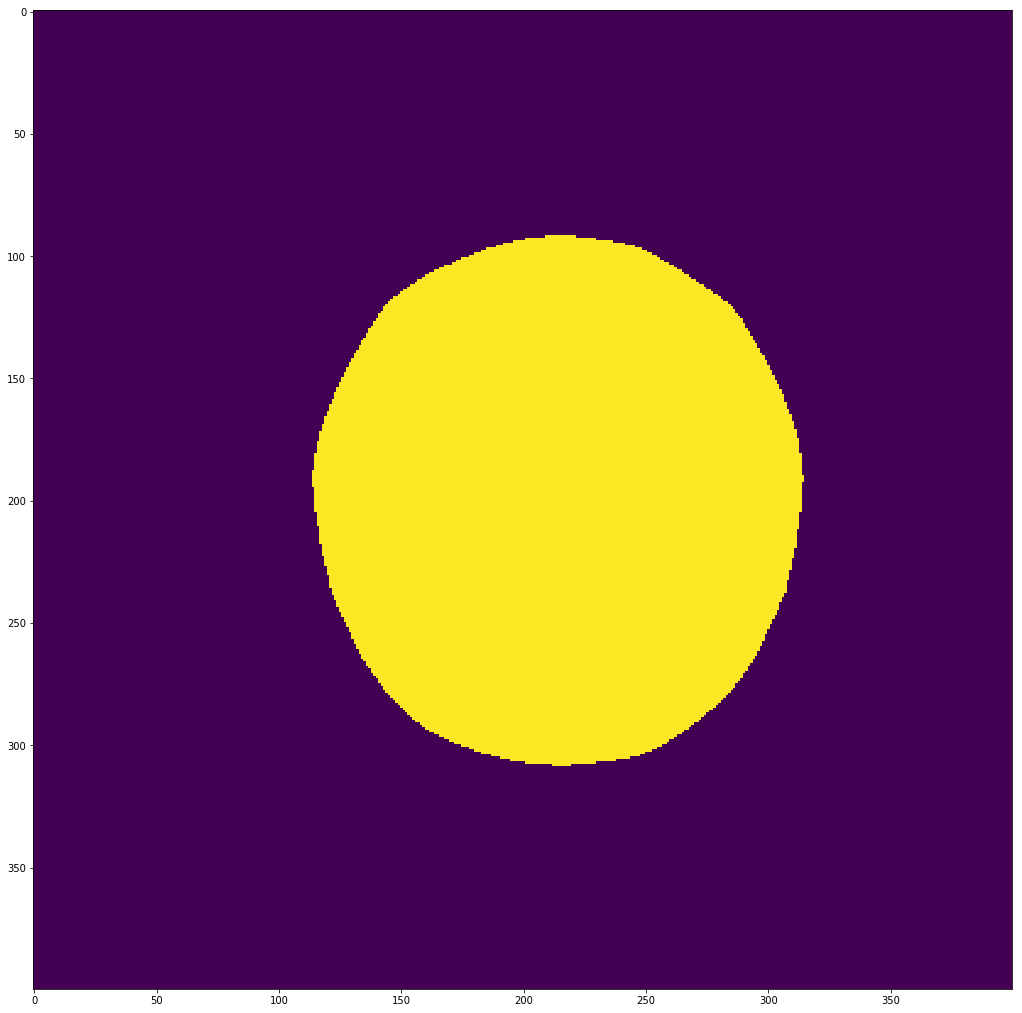

In [38]:
plt.figure(figsize=(18, 18))
plt.imshow(field)

In [39]:
import numpy as np
np.sum(field)

34096